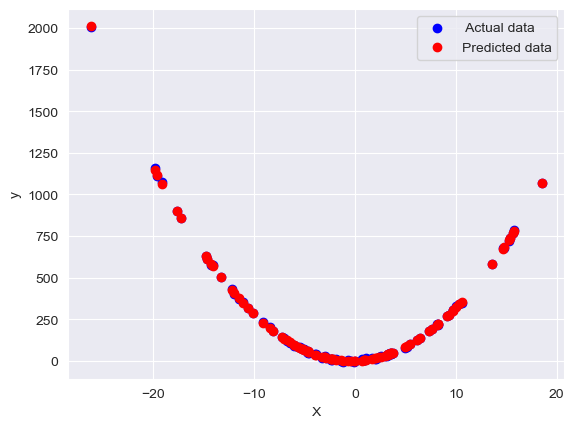

Mean squared error 21.062448667937797


In [4]:

import numpy as np
from matplotlib import pyplot as plt
from scipy.odr import polynomial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
#Generate Synthetic Data
np.random.seed(42)
X = np.random.randn(100, 1) * 10
y = 3 * X**2 + 2 * X + np.random.randn(100,1) * 5



#Transform features to polynomial
poly_features = PolynomialFeatures(degree =2 , include_bias = False)
x_poly = poly_features.fit_transform(X)


#Fit Polynomial Regression
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)


#Plot Result
plt.scatter(X, y, color = 'blue', label = ' Actual data')
plt.scatter(X, y_pred, color = 'red', label = 'Predicted data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#Evaluate model

mse = mean_squared_error(y, y_pred)
print("Mean squared error",mse)

Regularization: lasso and ridge

In [9]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Generate synthetic Data
np.random.seed(42)
X = np.random.randn(100, 1) * 10
y = 3 * X**2 + 2 * X + np.random.randn(100,1) * 5

#Transform features to Polynomial
poly_features = PolynomialFeatures(degree = 2 , include_bias = False)
X_poly = poly_features.fit_transform(X)

#set the train and test

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)


#Ridge Regression

ridge_model = Ridge(alpha = 1)
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)


#lasso Regression
lasso_model = Lasso(alpha = 1)
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)


#Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE",ridge_mse)

#Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE",lasso_mse)

Ridge MSE 21.439905337904055
Lasso MSE 21.280393476784887


Hands on Exercise: Implement polynomial Regression and Visualize the Fit

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


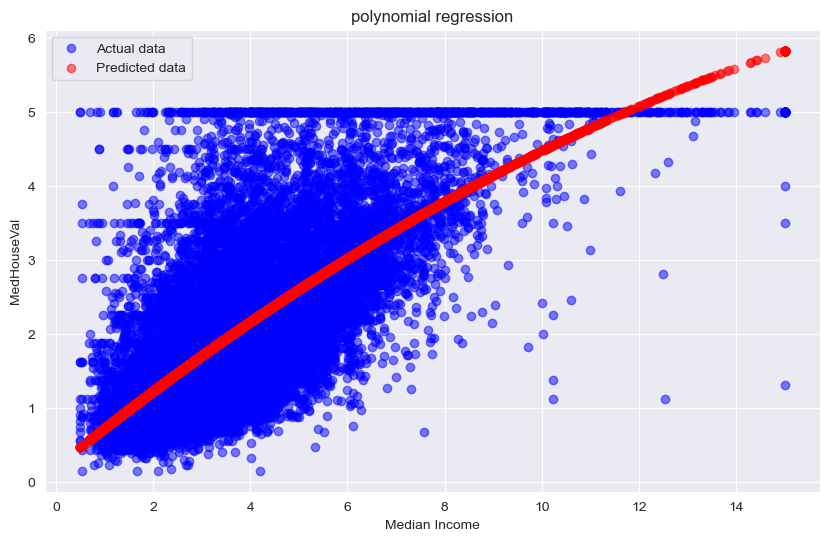

Mean squared error 0.6950372537239728


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

#Load the California Housing DataSet
load_data = fetch_california_housing(as_frame = True)
df = load_data.frame

#Select feature (Median Income) and target(Median House Values )
print(df.head())
X = df[['MedInc']]
y = df[['MedHouseVal']]

#Transform Features to Polynomial Features
poly_features = PolynomialFeatures(degree = 2 , include_bias = False)
x_poly = poly_features.fit_transform(X)


# #Use Lasso and Ridge Regression (second exercise)
# #Split Data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)
#
#
# #Ridge Regression
# ridge_model = Ridge(alpha = 1)
# ridge_model.fit(X_train, y_train)
# ridge_predictions = ridge_model.predict(X_test)
#
# #Lasso Regression
# lasso_model = Lasso(alpha = 1)
# lasso_model.fit(X_train, y_train)
# lasso_predictions = lasso_model.predict(X_test)
#
# #Evaluate
# ridge_mse = mean_squared_error(y_test, ridge_predictions)
# print("Ridge MSE",ridge_mse)
# lasso_mse = mean_squared_error(y_test, lasso_predictions)
# print("Lasso MSE",lasso_mse)

#Visualize Ridge Vs lasso predictions

# plt.figure(figsize=(12,8))
# plt.scatter(X_test[:,0], y_test, color = 'blue', label = 'Actual data', alpha = 0.5)
# plt.scatter(X_test[:,0], ridge_predictions, color = 'red', label = 'Ridge Predictions', alpha = 0.5)
# plt.scatter(X_test[:,0], lasso_predictions, color = 'green', label = 'Lasso Predictions', alpha = 0.5)
# plt.title('Actual vs Ridge and Lasso Predictions')
# plt.xlabel('MedInc')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()



















#Fit polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

#Make Predictions
y_pred = model.predict(x_poly)

#plot actual and predicted value
plt.figure(figsize=(10,6))
plt.scatter(X, y, color = 'blue', label = 'Actual data', alpha = 0.5)
plt.scatter(X, y_pred, color = 'red', label = 'Predicted data',alpha = 0.5)
plt.title('polynomial regression')
plt.xlabel('Median Income')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()

#Evaluate model performance
mse = mean_squared_error(y, y_pred)
print("Mean squared error",mse)
